In [65]:
#Data Manipulation
import pandas as pd
import numpy as np
import re

#data visul.
import matplotlib.pyplot as plt
import seaborn as sns


#pre-processing tools
from scipy import stats
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OrdinalEncoder,OneHotEncoder
from sklearn.model_selection import GridSearchCV,cross_val_score,train_test_split

#Algo. for linear model
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Lasso,Ridge,LassoCV,RidgeCV

#Ensembling techniques
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

#Evolution metrics
from sklearn.metrics import r2_score

In [48]:
df = pd.read_excel('CARS24.xlsx')

In [49]:
df

,Company,Model,Year,Condition,Fuel Type,KM,Owner,Transmission,Insurance Vald,State,Price
0,Hyundai,Eon ERA PLUS,2014.0,Non-Accidental,Petrol,12232.0,1.0,MANUAL,Feb 2022,DELHI,228299.0
1,Hyundai,VENUE S MT 1.2 KAPPA,2021.0,Non-Accidental,Petrol,2589.0,1.0,NaN,Apr 2022,DELHI,794699.0
2,Maruti,Alto K10 VXI,2017.0,Non-Accidental,Petrol,11691.0,1.0,MANUAL,Oct 2022,DELHI,345699.0
3,Maruti,Swift LXI,2012.0,Non-Accidental,Petrol,31999.0,1.0,MANUAL,Oct 2022,DELHI,294399.0
4,Maruti,Alto 800 LXI,2017.0,Non-Accidental,Petrol,8501.0,1.0,MANUAL,Oct 2022,DELHI,293799.0
...,...,...,...,...,...,...,...,...,...,...,...
13186,Maruti,Ritz VDI,2012.0,Non-Accidental,Diesel,122524.0,1.0,MANUAL,Oct 2022,DELHI,209299.0
13187,Maruti,Swift VDI,2012.0,Non-Accidental,Diesel,124996.0,1.0,MANUAL,Oct 2022,DELHI,326099.0
13188,Ford,Ecosport TITANIUM PLUS 1.5 TI VCT MT,2018.0,Non-Accidental,Petrol,91027.0,1.0,MANUAL,Oct 2022,DELHI,689999.0
13189,Maruti,Vitara Brezza VDI,2019.0,Non-Accidental,Diesel,62527.0,1.0,MANUAL,Oct 2022,DELHI,771000.0


In [50]:
df.drop_duplicates()
print(df.shape)

(13191, 11)


There is no duplicate enteries in data set

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13191 entries, 0 to 13190
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         12974 non-null  object 
 1   Model           12974 non-null  object 
 2   Year            12974 non-null  float64
 3   Condition       12974 non-null  object 
 4   Fuel Type       12974 non-null  object 
 5   KM              12974 non-null  float64
 6   Owner           12974 non-null  float64
 7   Transmission    12507 non-null  object 
 8   Insurance Vald  12974 non-null  object 
 9   State           12966 non-null  object 
 10  Price           12974 non-null  float64
dtypes: float64(4), object(7)
memory usage: 1.1+ MB


#### Categorical features

In [52]:
# Analyzing Categorical Variables

categorical_variable = [i for i in df.columns if df[i].dtype =='O']

categorical_variable

['Company',
 'Model',
 'Condition',
 'Fuel Type',
 'Transmission',
 'Insurance Vald',
 'State']

In [53]:
# checking total no of unique values in each categorical variable

for i in categorical_variable:
    print(i ,"------", "have unique " , df[i].nunique(),"values")

Company ------ have unique  27 values
Model ------ have unique  682 values
Condition ------ have unique  1 values
Fuel Type ------ have unique  3 values
Transmission ------ have unique  2 values
Insurance Vald ------ have unique  26 values
State ------ have unique  5 values


In [54]:
#finding count of unique values in each categorical variable

for i in categorical_variable:
    print(i ,"------", "have" , df[i].isnull().sum()," Null values")

Company ------ have 217  Null values
Model ------ have 217  Null values
Condition ------ have 217  Null values
Fuel Type ------ have 217  Null values
Transmission ------ have 684  Null values
Insurance Vald ------ have 217  Null values
State ------ have 225  Null values


In [55]:
df

,Company,Model,Year,Condition,Fuel Type,KM,Owner,Transmission,Insurance Vald,State,Price
0,Hyundai,Eon ERA PLUS,2014.0,Non-Accidental,Petrol,12232.0,1.0,MANUAL,Feb 2022,DELHI,228299.0
1,Hyundai,VENUE S MT 1.2 KAPPA,2021.0,Non-Accidental,Petrol,2589.0,1.0,NaN,Apr 2022,DELHI,794699.0
2,Maruti,Alto K10 VXI,2017.0,Non-Accidental,Petrol,11691.0,1.0,MANUAL,Oct 2022,DELHI,345699.0
3,Maruti,Swift LXI,2012.0,Non-Accidental,Petrol,31999.0,1.0,MANUAL,Oct 2022,DELHI,294399.0
4,Maruti,Alto 800 LXI,2017.0,Non-Accidental,Petrol,8501.0,1.0,MANUAL,Oct 2022,DELHI,293799.0
...,...,...,...,...,...,...,...,...,...,...,...
13186,Maruti,Ritz VDI,2012.0,Non-Accidental,Diesel,122524.0,1.0,MANUAL,Oct 2022,DELHI,209299.0
13187,Maruti,Swift VDI,2012.0,Non-Accidental,Diesel,124996.0,1.0,MANUAL,Oct 2022,DELHI,326099.0
13188,Ford,Ecosport TITANIUM PLUS 1.5 TI VCT MT,2018.0,Non-Accidental,Petrol,91027.0,1.0,MANUAL,Oct 2022,DELHI,689999.0
13189,Maruti,Vitara Brezza VDI,2019.0,Non-Accidental,Diesel,62527.0,1.0,MANUAL,Oct 2022,DELHI,771000.0


In [56]:
data_1=df.copy()

In [57]:
#Dropping null value contain rows
data = data_1.dropna()

In [58]:
#finding unique values in each categorical variable

for i in categorical_variable:
    print(i ,"------", "have" , data[i].isnull().sum()," Null values")

Company ------ have 0  Null values
Model ------ have 0  Null values
Condition ------ have 0  Null values
Fuel Type ------ have 0  Null values
Transmission ------ have 0  Null values
Insurance Vald ------ have 0  Null values
State ------ have 0  Null values


Observ :- 
    we had dropped that all rows which contain null values.

In [59]:
# checking total no of unique values in each categorical variable after removing null values from dataset

for i in categorical_variable:
    print(i ,"------", "have unique " , data[i].nunique(),"values")

Company ------ have unique  27 values
Model ------ have unique  632 values
Condition ------ have unique  1 values
Fuel Type ------ have unique  3 values
Transmission ------ have unique  2 values
Insurance Vald ------ have unique  26 values
State ------ have unique  5 values


In [60]:
data.shape

(12499, 11)

In [61]:
#Removing feature which have distinct value in dataset

distinct_value =[i for i in categorical_variable if data[i].nunique()==1]
distinct_value

data_mod=data.drop(distinct_value,axis=1)
print(data_mod.shape)

(12499, 10)


In [62]:
# Seperating year and month of insurance expiry from "Insurance Vald" column

mix = data_mod['Insurance Vald'].tolist()
insurance_month = []

insu_exp_month=[]
insu_exp_year=[]

for i in mix:
        insurance_month.append(re.split('\s',i))
for i in insurance_month:
    insu_exp_month.append(i[0])
    insu_exp_year.append(i[1])
    
print(len(insu_exp_month))
print(len(insu_exp_year))

#Adding new column into the dataframe

data_mod["Ins_Expry_Month"] = insu_exp_month 
data_mod["Ins_Expry_Year"] = insu_exp_year


data_mod = data_mod.drop(columns='Insurance Vald')


data_mod.shape

12499
12499


(12499, 11)

In [63]:
data_mod.head(5)

,Company,Model,Year,Fuel Type,KM,Owner,Transmission,State,Price,Ins_Expry_Month,Ins_Expry_Year
0,Hyundai,Eon ERA PLUS,2014.0,Petrol,12232.0,1.0,MANUAL,DELHI,228299.0,Feb,2022
2,Maruti,Alto K10 VXI,2017.0,Petrol,11691.0,1.0,MANUAL,DELHI,345699.0,Oct,2022
3,Maruti,Swift LXI,2012.0,Petrol,31999.0,1.0,MANUAL,DELHI,294399.0,Oct,2022
4,Maruti,Alto 800 LXI,2017.0,Petrol,8501.0,1.0,MANUAL,DELHI,293799.0,Oct,2022
5,Maruti,Alto 800 VXI,2014.0,Petrol,12535.0,1.0,MANUAL,DELHI,293599.0,Oct,2022


In [64]:
categorical_variable = [i for i in data_mod.columns if data_mod[i].dtype =='O' and 'Year' not in i]

categorical_variable

['Company', 'Model', 'Fuel Type', 'Transmission', 'State', 'Ins_Expry_Month']

#### Categorical features 

Plotting graphs and finding relation between categorical features and price of car

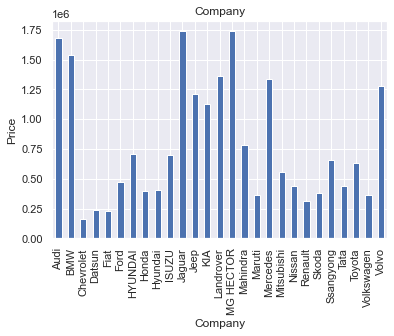

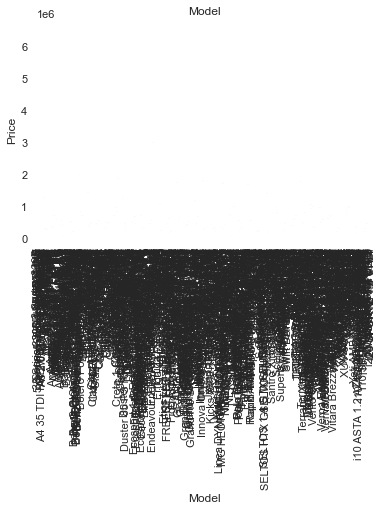

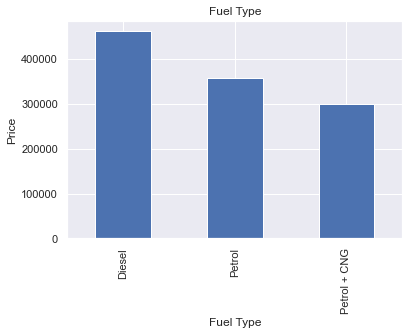

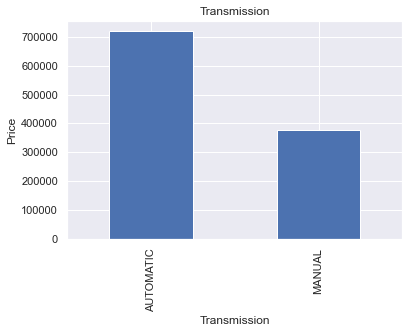

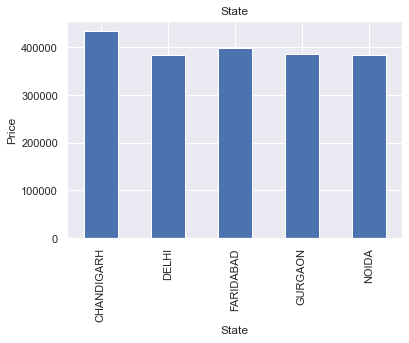

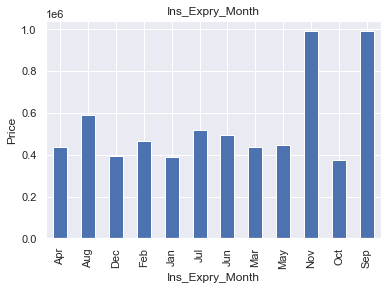

In [476]:
for i in categorical_variable:
    data_mod.groupby(i)['Price'].median().plot.bar()
    plt.title(i)
    plt.xlabel(i)
    plt.ylabel('Price')
    plt.show()

#### Year Feature

In [477]:
#Working with year feature

year_feature = [i for i in data_mod.columns if 'Year' in i]
year_feature

['Year', 'Ins_Expry_Year']

In [478]:
data_mod[year_feature]

,Year,Ins_Expry_Year
0,2014.0,2022
2,2017.0,2022
3,2012.0,2022
4,2017.0,2022
5,2014.0,2022
...,...,...
13186,2012.0,2022
13187,2012.0,2022
13188,2018.0,2022
13189,2019.0,2022


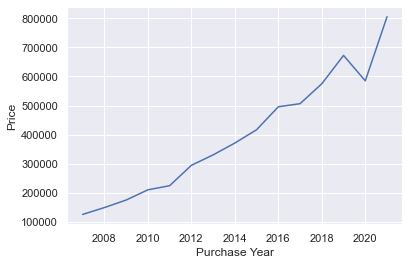

In [479]:
#Comparing car price with car manufactured year

data_mod.groupby(data_mod[year_feature]['Year'])['Price'].median().plot()
plt.xlabel('Purchase Year')
plt.ylabel('Price')
plt.show()

#### Numerical Features

In [481]:
#Working with numerical features from dataset


numerical_feature = [i for i in data_mod.columns if data_mod[i].dtype != 'O' and 'Year' not in i]
numerical_feature

['KM', 'Owner', 'Price']

In [483]:
#seperating continuous and descrite variable from numerical fetaures 

continuous_feature = [i for i in numerical_feature if (data_mod[i].nunique())>25]

continuous_feature

['KM', 'Price']

In [484]:
discrete_feature = [i for i in numerical_feature if (data_mod[i].nunique())<25]
discrete_feature

['Owner']

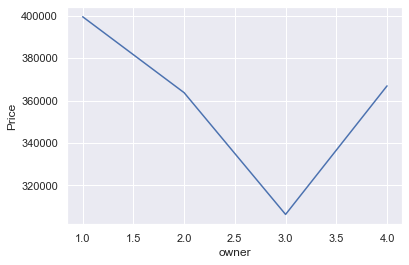

In [487]:
#Comparing car price with car manufactured year

data_mod.groupby(data_mod['Owner'])['Price'].median().plot()
plt.xlabel('owner')
plt.ylabel('Price')
plt.show()

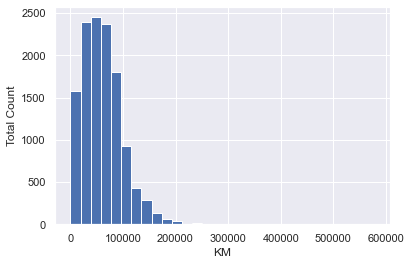

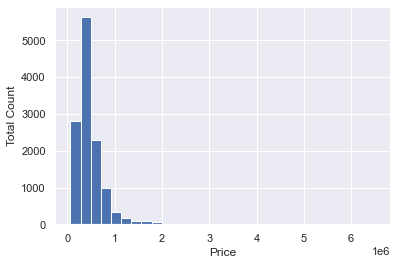

In [488]:
#Data distribution of continuous variable
dg = data_mod.copy()

for i in continuous_feature:
    dg[i].hist(bins=30)
    plt.ylabel("Total Count")
    plt.xlabel(i)
    plt.show()

C:\Users\Ashish.Bomble\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='KM', ylabel='Density'>

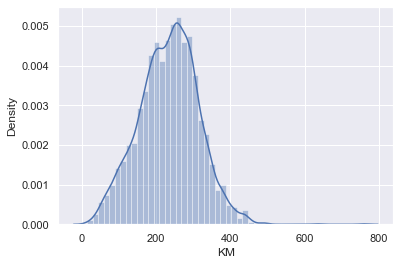

In [489]:
#plotting graph og "KM" column for checking distribution of data points. 
dg['KM']=np.sqrt(dg['KM'])
sns.distplot(dg['KM'])

C:\Users\Ashish.Bomble\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='KM'>

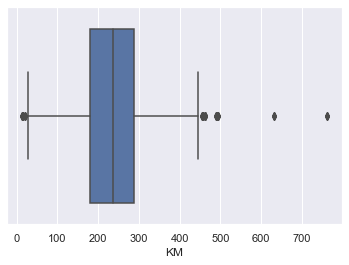

In [490]:
#plotting box plot for checking outlier
sns.boxplot(dg['KM'])

In [491]:
data_mod

,Company,Model,Year,Fuel Type,KM,Owner,Transmission,State,Price,Ins_Expry_Month,Ins_Expry_Year
0,Hyundai,Eon ERA PLUS,2014.0,Petrol,12232.0,1.0,MANUAL,DELHI,228299.0,Feb,2022
2,Maruti,Alto K10 VXI,2017.0,Petrol,11691.0,1.0,MANUAL,DELHI,345699.0,Oct,2022
3,Maruti,Swift LXI,2012.0,Petrol,31999.0,1.0,MANUAL,DELHI,294399.0,Oct,2022
4,Maruti,Alto 800 LXI,2017.0,Petrol,8501.0,1.0,MANUAL,DELHI,293799.0,Oct,2022
5,Maruti,Alto 800 VXI,2014.0,Petrol,12535.0,1.0,MANUAL,DELHI,293599.0,Oct,2022
...,...,...,...,...,...,...,...,...,...,...,...
13186,Maruti,Ritz VDI,2012.0,Diesel,122524.0,1.0,MANUAL,DELHI,209299.0,Oct,2022
13187,Maruti,Swift VDI,2012.0,Diesel,124996.0,1.0,MANUAL,DELHI,326099.0,Oct,2022
13188,Ford,Ecosport TITANIUM PLUS 1.5 TI VCT MT,2018.0,Petrol,91027.0,1.0,MANUAL,DELHI,689999.0,Oct,2022
13189,Maruti,Vitara Brezza VDI,2019.0,Diesel,62527.0,1.0,MANUAL,DELHI,771000.0,Oct,2022


In [492]:
# Deleting manufacture year from current year calculate age of vehicle

mix = data_mod['Year'].tolist()
ins_yr = []

yrs_old=[]


for i in mix:
        ins_yr.append(2021-i)
for i in ins_yr:
    yrs_old.append(i)

    
print(len(yrs_old))




# Deleting insurance expiry  year from current year calculate remaining years

mix_1= data_mod['Ins_Expry_Year'].tolist()
ins_yr_remian = []

inx_remian=[]

for i in mix_1:
        ins_yr_remian.append(int(i)-2021)
for i in ins_yr_remian:
    inx_remian.append(i)

    

print(len(inx_remian))

#Adding new column into the dataframe

data_mod["Years_Old"] = yrs_old 
data_mod["Ins_Expry_remain"] = inx_remian




data_mod.shape

12499
12499


(12499, 13)

In [493]:
data_mod

,Company,Model,Year,Fuel Type,KM,Owner,Transmission,State,Price,Ins_Expry_Month,Ins_Expry_Year,Years_Old,Ins_Expry_remain
0,Hyundai,Eon ERA PLUS,2014.0,Petrol,12232.0,1.0,MANUAL,DELHI,228299.0,Feb,2022,7.0,1
2,Maruti,Alto K10 VXI,2017.0,Petrol,11691.0,1.0,MANUAL,DELHI,345699.0,Oct,2022,4.0,1
3,Maruti,Swift LXI,2012.0,Petrol,31999.0,1.0,MANUAL,DELHI,294399.0,Oct,2022,9.0,1
4,Maruti,Alto 800 LXI,2017.0,Petrol,8501.0,1.0,MANUAL,DELHI,293799.0,Oct,2022,4.0,1
5,Maruti,Alto 800 VXI,2014.0,Petrol,12535.0,1.0,MANUAL,DELHI,293599.0,Oct,2022,7.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13186,Maruti,Ritz VDI,2012.0,Diesel,122524.0,1.0,MANUAL,DELHI,209299.0,Oct,2022,9.0,1
13187,Maruti,Swift VDI,2012.0,Diesel,124996.0,1.0,MANUAL,DELHI,326099.0,Oct,2022,9.0,1
13188,Ford,Ecosport TITANIUM PLUS 1.5 TI VCT MT,2018.0,Petrol,91027.0,1.0,MANUAL,DELHI,689999.0,Oct,2022,3.0,1
13189,Maruti,Vitara Brezza VDI,2019.0,Diesel,62527.0,1.0,MANUAL,DELHI,771000.0,Oct,2022,2.0,1


In [494]:
data_mod = data_mod.drop(columns=['Year','Ins_Expry_Year'])
data_mod.shape
data_mod

,Company,Model,Fuel Type,KM,Owner,Transmission,State,Price,Ins_Expry_Month,Years_Old,Ins_Expry_remain
0,Hyundai,Eon ERA PLUS,Petrol,12232.0,1.0,MANUAL,DELHI,228299.0,Feb,7.0,1
2,Maruti,Alto K10 VXI,Petrol,11691.0,1.0,MANUAL,DELHI,345699.0,Oct,4.0,1
3,Maruti,Swift LXI,Petrol,31999.0,1.0,MANUAL,DELHI,294399.0,Oct,9.0,1
4,Maruti,Alto 800 LXI,Petrol,8501.0,1.0,MANUAL,DELHI,293799.0,Oct,4.0,1
5,Maruti,Alto 800 VXI,Petrol,12535.0,1.0,MANUAL,DELHI,293599.0,Oct,7.0,1
...,...,...,...,...,...,...,...,...,...,...,...
13186,Maruti,Ritz VDI,Diesel,122524.0,1.0,MANUAL,DELHI,209299.0,Oct,9.0,1
13187,Maruti,Swift VDI,Diesel,124996.0,1.0,MANUAL,DELHI,326099.0,Oct,9.0,1
13188,Ford,Ecosport TITANIUM PLUS 1.5 TI VCT MT,Petrol,91027.0,1.0,MANUAL,DELHI,689999.0,Oct,3.0,1
13189,Maruti,Vitara Brezza VDI,Diesel,62527.0,1.0,MANUAL,DELHI,771000.0,Oct,2.0,1


C:\Users\Ashish.Bomble\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Years_Old', ylabel='Density'>

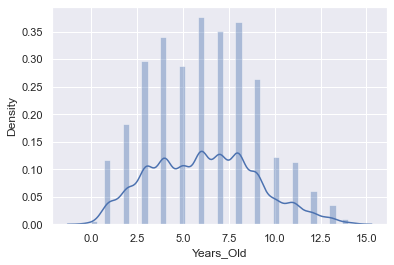

In [495]:
sns.distplot(data_mod['Years_Old'])

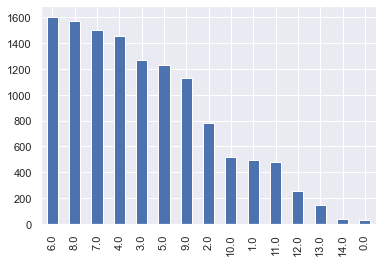

In [496]:
sns.set(style='darkgrid')
data_mod['Years_Old'].value_counts().plot(kind='bar')
plt.show()

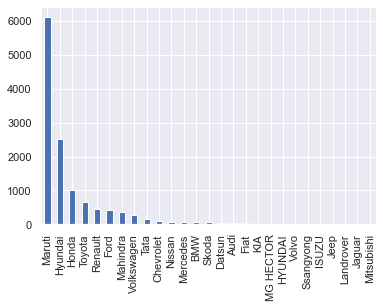

In [497]:
sns.set(style='darkgrid')
data_mod['Company'].value_counts().plot(kind='bar')
plt.show()

In [498]:
data_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12499 entries, 0 to 13190
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           12499 non-null  object 
 1   Model             12499 non-null  object 
 2   Fuel Type         12499 non-null  object 
 3   KM                12499 non-null  float64
 4   Owner             12499 non-null  float64
 5   Transmission      12499 non-null  object 
 6   State             12499 non-null  object 
 7   Price             12499 non-null  float64
 8   Ins_Expry_Month   12499 non-null  object 
 9   Years_Old         12499 non-null  float64
 10  Ins_Expry_remain  12499 non-null  int64  
dtypes: float64(4), int64(1), object(6)
memory usage: 1.1+ MB


In [499]:
new_data_mod = data_mod.copy()

In [500]:
#convert data from object to in t by using ordinal encoder
ord_enc=OrdinalEncoder()
for i in categorical_variable:
    new_data_mod[i]=ord_enc.fit_transform(new_data_mod[[i]])

In [501]:
new_data_mod

,Company,Model,Fuel Type,KM,Owner,Transmission,State,Price,Ins_Expry_Month,Years_Old,Ins_Expry_remain
0,8.0,221.0,1.0,12232.0,1.0,1.0,1.0,228299.0,3.0,7.0,1
2,16.0,21.0,1.0,11691.0,1.0,1.0,1.0,345699.0,10.0,4.0,1
3,16.0,476.0,1.0,31999.0,1.0,1.0,1.0,294399.0,10.0,9.0,1
4,16.0,16.0,1.0,8501.0,1.0,1.0,1.0,293799.0,10.0,4.0,1
5,16.0,18.0,1.0,12535.0,1.0,1.0,1.0,293599.0,10.0,7.0,1
...,...,...,...,...,...,...,...,...,...,...,...
13186,16.0,416.0,0.0,122524.0,1.0,1.0,1.0,209299.0,10.0,9.0,1
13187,16.0,479.0,0.0,124996.0,1.0,1.0,1.0,326099.0,10.0,9.0,1
13188,5.0,198.0,1.0,91027.0,1.0,1.0,1.0,689999.0,10.0,3.0,1
13189,16.0,552.0,0.0,62527.0,1.0,1.0,1.0,771000.0,10.0,2.0,1


C:\Users\Ashish.Bomble\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='KM', ylabel='Density'>

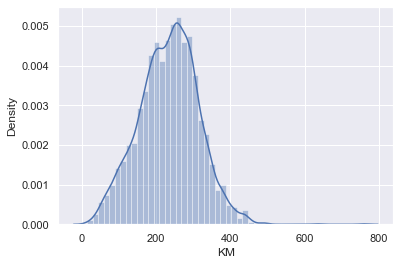

In [502]:
new_data_mod['KM']=np.sqrt(new_data_mod['KM'])
sns.distplot(new_data_mod['KM'])

In [503]:
#Seperating target and independant variables from dataset
x = new_data_mod.drop(columns='Price')
y = new_data_mod['Price']

In [505]:
#scaled independant variable
scalar = MinMaxScaler(feature_range=(0,1))
x_scaled = scalar.fit_transform(x)

In [506]:
#Shape of scaled data
x_scaled.shape

(12499, 10)

In [508]:
#Applying DT Algorithm
dt = DecisionTreeRegressor()
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.22,random_state=0)
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
print(dt.score(x_train,y_train))
print(r2_score(y_test,pred))

0.999993077385277
0.9939086118285532


In [509]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(9749, 10)
(9749,)
(2750, 10)
(2750,)


Text(0, 0.5, 'pred')

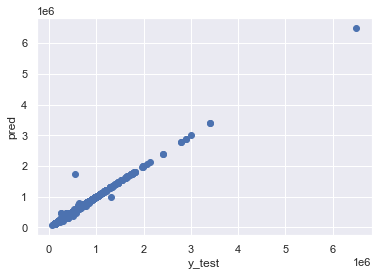

In [512]:
#Plotting predicted vs actual data points
plt.scatter(x=y_test,y=pred)
plt.xlabel('y_test')
plt.ylabel('pred')

C:\Users\Ashish.Bomble\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

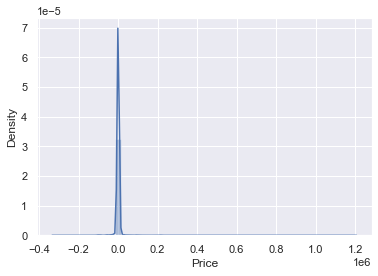

In [513]:
#graph
sns.distplot(pred-y_test)

### conclusion

In [514]:
colcl = pd.DataFrame([dt.predict(x_test)[:],y_test[:]],index=['predict','original'])

In [515]:
colcl.shape

(2, 2750)

In [516]:
with pd.option_context("display.max_columns",2750):display(colcl)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

In [517]:
Train_accurecy = r2_score(y_train,dt.predict(x_train))

Test_accurecy = r2_score(y_test,pred)

print(Train_accurecy)

print(Test_accurecy)

0.999993077385277
0.9939086118285532


In [518]:
for i in range(5,15): 
    cv_score = cross_val_score(dt,x_scaled,y,cv = i) 
    cv_mean=cv_score.mean() 
    print("At CV",i,"the cv score is",cv_mean,"and accuracy for training is ",Train_accurecy,"and accurecy for testing is",Test_accurecy) 
    print("\n")

At CV 5 the cv score is 0.9969570996188422 and accuracy for training is  0.999993077385277 and accurecy for testing is 0.9939086118285532


At CV 6 the cv score is 0.9944061767968858 and accuracy for training is  0.999993077385277 and accurecy for testing is 0.9939086118285532


At CV 7 the cv score is 0.9948166874602808 and accuracy for training is  0.999993077385277 and accurecy for testing is 0.9939086118285532


At CV 8 the cv score is 0.9973561235096372 and accuracy for training is  0.999993077385277 and accurecy for testing is 0.9939086118285532


At CV 9 the cv score is 0.9969679193542523 and accuracy for training is  0.999993077385277 and accurecy for testing is 0.9939086118285532


At CV 10 the cv score is 0.9951191730639207 and accuracy for training is  0.999993077385277 and accurecy for testing is 0.9939086118285532


At CV 11 the cv score is 0.995725766459918 and accuracy for training is  0.999993077385277 and accurecy for testing is 0.9939086118285532


At CV 12 the cv sco

##### Observation :-
    By using Decisiontreeregressor we are getting good accurecy score .
    Cross validation is also confirming that Decisiontreeregressor with its default parameter giving good accurecy for testing
    as well as training data.

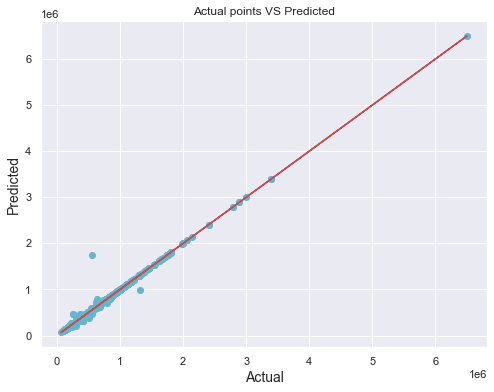

In [519]:
#PLotting linear predicted line along with dataPoints

plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred,color='c')
plt.plot(y_test,y_test,color='r')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Actual points VS Predicted')
plt.show()

In [520]:
#Saving the model
import pickle
file = 'car_price_model.pkl'
pickle.dump(dt,open(file,'wb'))

In [521]:
loaded_model = pickle.load(open(file,'rb'))
result = loaded_model.score(x_test,y_test)
print(result)

0.9939086118285532
